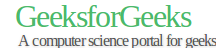

In [8]:
import cv2
from google.colab.patches import cv2_imshow  # for displaying in Google Colab

# Step 2: Read the image
img = cv2.imread("/content/Input_image.png")  # Replace with your image filename

if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    cv2_imshow(img)  # Display the original image

In [2]:
# Step 3: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Step 4: Apply median blur
gray_blur = cv2.medianBlur(gray, 5)

In [4]:
# Step 5: Detect edges
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,
                              blockSize=9, C=9)

In [5]:
# Step 6: Apply bilateral filter to smooth colors
color = cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)

In [6]:
# Step 7: Combine edges with color image
cartoon = cv2.bitwise_and(color, color, mask=edges)

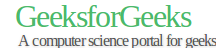

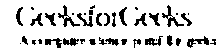

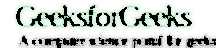

In [7]:
# Step 8: Show and save the results
cv2_imshow(img)        # Original image
cv2_imshow(edges)      # Edges image
cv2_imshow(cartoon)    # Cartoon image

# Save the cartoon image
cv2.imwrite("cartoon_output.jpg", cartoon)

cv2.waitKey(0)
cv2.destroyAllWindows()